# Graphical exploratory data analysis

## Introduction to Exploratory Data Analysis


In [2]:
import pandas as pd

In [3]:
df_swing = pd.read_csv('data/2008_swing_states.csv')
df_swing[['state', 'county', 'dem_share']]

,state,county,dem_share
0,PA,Erie County,60.08
1,PA,Bradford County,40.64
2,PA,Tioga County,36.07
3,PA,McKean County,41.21
4,PA,Potter County,31.04
...,...,...,...
217,OH,Hamilton County,53.53
218,OH,Highland County,36.54
219,OH,Hocking County,49.58
220,OH,Licking County,41.97


## Ploling a histogram

### Ploling a histogram

In [4]:
import matplotlib.pyplot as plt 

_ = plt.hist(df_swing['dem_share'])
_ = plt.xlabel('percent of vote for Obama')
_ = plt.ylabel('number of counties')
plt.show()

<Figure size 640x480 with 1 Axes>

### Seting the bins of a histogram 

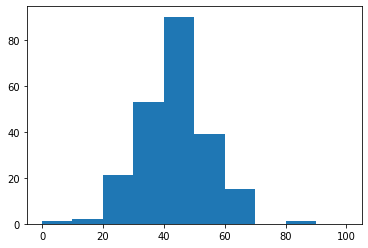

In [5]:
bin_edges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
_ = plt.hist(df_swing['dem_share'], bins=bin_edges)
plt.show()

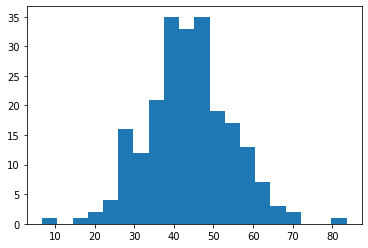

In [6]:
_ = plt.hist(df_swing['dem_share'], bins=20)
plt.show()

### Seting Seaborn styling

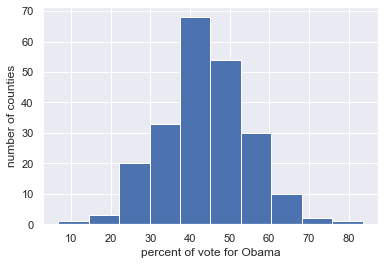

In [7]:
import seaborn as sns
# set style to be the seaborn default
sns.set()
_ = plt.hist(df_swing['dem_share'])
_ = plt.xlabel('percent of vote for Obama') 
_ = plt.ylabel('number of counties') 
plt.show()

## Plot all of your data: Bee swarm plots

### Generating a bee swarm plot

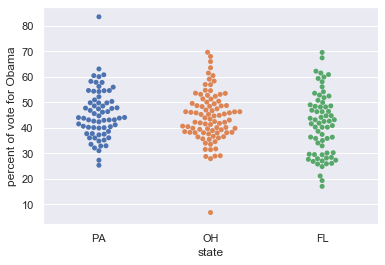

In [8]:
_ = sns.swarmplot(x='state', y='dem_share', data=df_swing)
_ = plt.xlabel('state')
_ = plt.ylabel('percent of vote for Obama')
plt.show()

## Plot all of your data: ECDFs

### Empirical cumulative distribution function (ECDF)

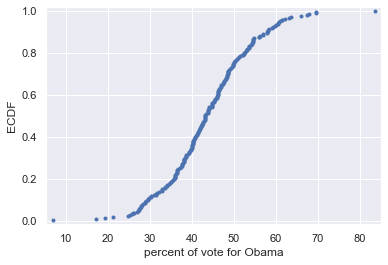

In [9]:
import numpy as np
x = np.sort(df_swing['dem_share'])
y = np.arange(1, len(x)+1) / len(x)
_ = plt.plot(x, y, marker='.', linestyle='none') # we just want points
_ = plt.xlabel('percent of vote for Obama')
_ = plt.ylabel('ECDF')
plt.margins(0.02) # Keeps data off plot edges In [8]: 
plt.show()

### Exercise: Computing the ECDF

In [10]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [11]:
versicolor_petal_length = np.array([4.7, 4.5, 4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. ,
    4.7, 3.6, 4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4,
    4.8, 5. , 4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1,
    4. , 4.4, 4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1])

Plotting the ECDF

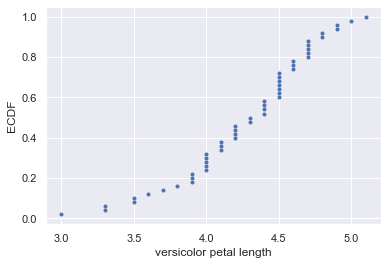

In [12]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)

# Generate plot
_ = plt.plot(x_vers, y_vers, marker = '.', linestyle = 'none')

# Label the axes
_ = plt.xlabel('versicolor petal length')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

Comparison of ECDFs

In [13]:
setosa_petal_length = np.array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4])

virginica_petal_length = np.array([6. , 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5,
    5. , 5.1, 5.3, 5.5, 6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. ,
    4.8, 4.9, 5.6, 5.8, 6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8,
    5.4, 5.6, 5.1, 5.1, 5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

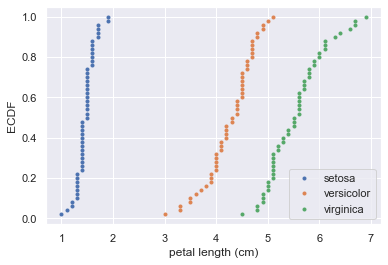

In [14]:
# Compute ECDFs
x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

# Plot all ECDFs on the same plot
_ = plt.plot(x_set, y_set, marker='.', linestyle='none')
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')
_ = plt.plot(x_virg, y_virg, marker='.', linestyle='none')

# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

# Quantitative exploratory data analysis

## Introduction to summary statistics: The sample mean and median

### Mean vote percentage
$mean=\bar{x}=\frac{1}{n} \sum_{i=1}^n$

In [18]:
import numpy as np

np.mean(df_swing[df_swing['state']=='PA']['dem_share'])

45.476417910447765

### Outliers

Data points whose value is far greater or less than most of the rest of the data.
An outlier can significantly affect the value of the mean, but not the median.

### The median
The middle value of a data set

In [23]:
np.median(df_swing[df_swing['state']=='PA']['dem_share'])

44.03

## Percentiles, outliers, and box plots

### Computing percentiles

In [25]:
np.percentile(df_swing['dem_share'], [25, 50, 75])

array([37.3025, 43.185 , 49.925 ])

### Generating a box plot

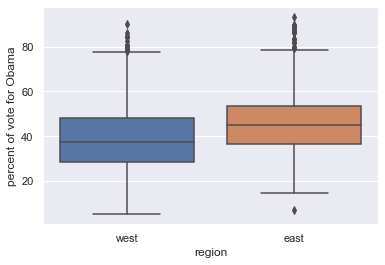

In [28]:
import matplotlib.pyplot as plt 
import seaborn as sns

df_all_states = pd.read_csv('data/2008_all_states.csv')

_ = sns.boxplot(x='east_west', y='dem_share', data=df_all_states)
_ = plt.xlabel('region')
_ = plt.ylabel('percent of vote for Obama') 
plt.show()

### Exercise: Iris 

Computing percentiles

In [29]:
# Specify array of percentiles: percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)

# Print the result
print(ptiles_vers)

[3.3    4.     4.35   4.6    4.9775]


Comparing percentiles to ECDF

In [45]:
from sklearn import datasets

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.Series(iris.target)

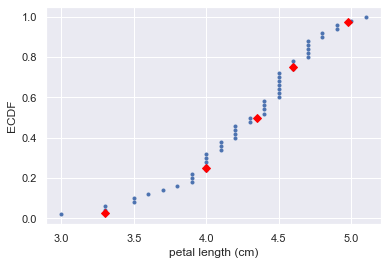

In [46]:
# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot
plt.show()

Box-and-whisker plot

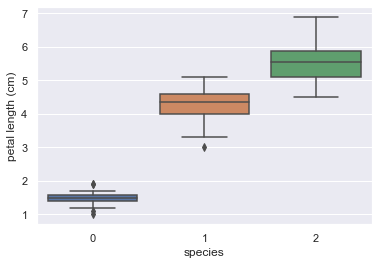

In [48]:
# Create box plot with Seaborn's default settings
_ = sns.boxplot(x='species', y='petal length (cm)', data=df)

# Label the axes
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')

# Show the plot
plt.show()

## Variance and standard deviation

### Variance

- The mean squared distance of the data from their mean
- Informally, a measure of the spread of data

$variance=\frac{1}{n} \sum_{i=1}^{n} (x_i- \bar{x})^2$

In [61]:
dem_share_FL = df_all_states[df_all_states['state']=='FL']['dem_share']
np.var(dem_share_FL)

147.44278618846064

In [62]:
np.std(dem_share_FL)

12.142602117687158

In [63]:
np.sqrt(np.var(dem_share_FL))

12.142602117687158

### Exercise

Computing the variance

In [64]:
# Array of differences to mean: differences
differences = versicolor_petal_length - np.mean(versicolor_petal_length)

# Square the differences: diff_sq
diff_sq = differences ** 2

# Compute the mean square difference: variance_explicit
variance_explicit = np.mean(diff_sq)

# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor_petal_length)

# Print the results
print(variance_explicit, variance_np)

0.21640000000000004 0.21640000000000004


The standard deviation and the variance

In [65]:
# Compute the variance: variance
variance = np.var(versicolor_petal_length)

# Print the square root of the variance
print(np.sqrt(variance))

# Print the standard deviation
print(np.std(versicolor_petal_length))

0.4651881339845203
0.4651881339845203


## Covariance and the Pearson correlation coefficient


### Generating a scatter plot

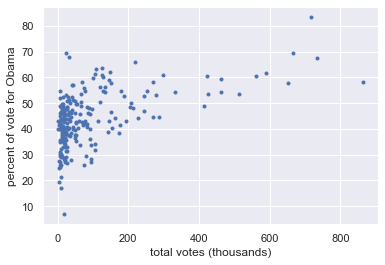

In [72]:
_ = plt.plot(df_swing['total_votes']/1000, df_swing["dem_share"], marker='.', linestyle='none')
_ = plt.xlabel('total votes (thousands)')
_ = plt.ylabel('percent of vote for Obama')

# we see the 12th most populated counties all voted for Obama.

### Covariance

A measure of how two quantities vary together
$covariance=\frac{1}{n} \sum_{i=1}^n (x_i-\bar{x})(y_i-\bar{y})$

### Pearson correlation coefficient

$\rho = Pearson correlation = \frac{covariance}{(std of x)(std of y)}= \frac{variability due to codependence}{independent variability}$

### Exercise

Scatter plots

In [79]:
versicolor_petal_width = np.array([1.4, 1.5, 1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. ,
    1.4, 1.3, 1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4,
    1.4, 1.7, 1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3,
    1.3, 1.2, 1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3])

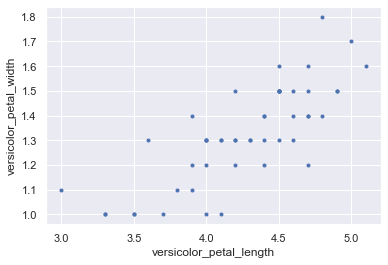

In [81]:
# Make a scatter plot
_ = plt.plot(versicolor_petal_length, versicolor_petal_width, marker='.', linestyle='none')

# Label the axes
_ = plt.xlabel('versicolor_petal_length')
_ = plt.ylabel('versicolor_petal_width')

# Show the result
plt.show()

Computing the covariance


In [82]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[1,0]

# Print the length/width covariance
print(petal_cov)

[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
0.07310204081632653


Computing the Pearson correlation coefficient


In [83]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r =  pearson_r(versicolor_petal_length, versicolor_petal_width)

# Print the result
print(r)

0.7866680885228169


# Thinking probabilistically-- Discrete variables


## Random number generators and hacker statistics

### Hacker statistics

- Uses simulated repeated measurements to compute probabilities.

### The `np.random` module

- Suite of functions based on random number generation
- `np.random.random()`:
    draw a number between 0 and 1
    
### Bernoulli trial

- An experiment that has two options, "success" (True) and "failure" (False).

### Random number seed

- Integer fed into random number generating algorithm
- Manually seed random number generator if you need reproducibility
- Specified using `np.random.seed()`

Simulating 4 coin flips

In [88]:
import numpy as np
np.random.seed(42)
random_numbers = np.random.random(size=4)
random_numbers

array([0.37454012, 0.95071431, 0.73199394, 0.59865848])

In [89]:
heads = random_numbers < 0.5 
heads

array([ True, False, False, False])

In [87]:
np.sum(heads)

1

In [90]:
n_all_heads = 0 # Initialize number of 4-heads trials

for _ in range(10000):
    heads = np.random.random(size=4) < 0.5
    n_heads = np.sum(heads)
    if n_heads == 4:
        n_all_heads += 1

n_all_heads / 10000

0.0619

### Hacker stats probabilities

- Determine how to simulate data
- Simulate many many times
- Probability is approximately fraction of trials with the outcome of interest

### Exercise

Generating random numbers using the np.random module

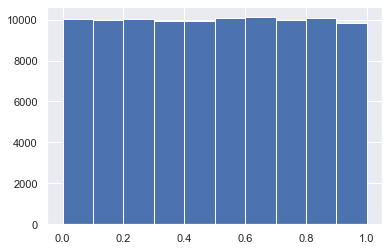

In [91]:
# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] =  np.random.random()

# Plot a histogram
_ = plt.hist(random_numbers)

# Show the plot
plt.show()

# The histogram is almost exactly flat across the top, 
# indicating that there is equal chance that a randomly-generated number is in any of the bins of the histogram.

The `np.random` module and Bernoulli trials

In [92]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success

How many defaults might we expect?

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  del sys.path[0]


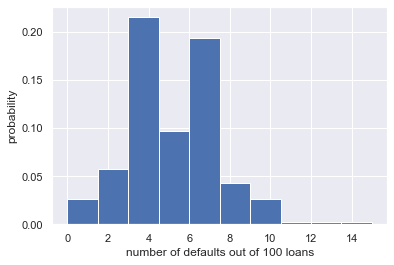

In [93]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)


# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, normed=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

Will the bank fail?

If interest rates are such that the bank will lose money if 10 or more of its loans are defaulted upon, what is the probability that the bank will lose money?

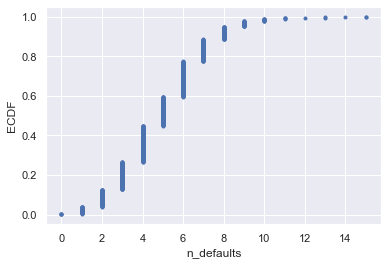

Probability of losing money = 0.022


In [94]:
# Compute ECDF: x, y
x = np.sort(n_defaults)
y = np.arange(1, len(x)+1) / len(x)
# Plot the ECDF with labeled axes
_ = plt.plot(x, y, marker='.', linestyle='none') # we just want points
_ = plt.xlabel('n_defaults')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum(n_defaults >= 10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))

## Probability distributions and stories: The Binomial distribution


### Probability mass function (PMF)

- The set of probabilities of discrete outcomes

### Discrete Uniform distribution: the story
- The outcome of rolling a single fair die is Discrete Uniformly distributed.

### Binomial distribution: the story

- The number r of successes in n Bernoulli trials with probability p of success, is Binomially distributed

- The number r of heads in 4 coin flips with probability 0.5 of heads, is Binomially distributed

Sampling from the Binomial distribution

In [95]:
np.random.binomial(4, 0.5) 

2

In [97]:
np.random.binomial(4, 0.5, size=10)

array([3, 1, 2, 1, 2, 2, 2, 2, 1, 3])

The Binomial PMF

In [98]:
samples = np.random.binomial(60, 0.1, size=10000)

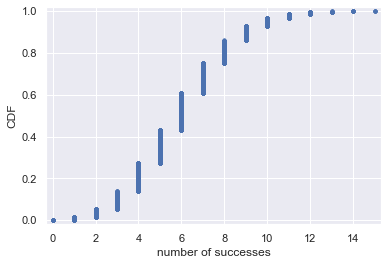

In [99]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
x, y = ecdf(samples)
_ = plt.plot(x, y, marker='.', linestyle='none') 
plt.margins(0.02)
_ = plt.xlabel('number of successes')
_ = plt.ylabel('CDF')
plt.show()

### Exercise

Sampling out of the Binomial distribution

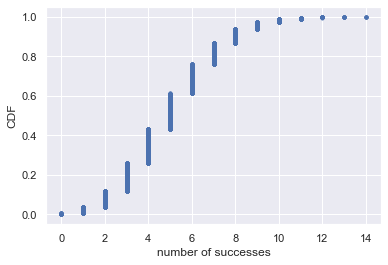

In [101]:
# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(n = 100, p = 0.05, size=10000)

# Compute CDF: x, y
x, y = ecdf(n_defaults)

# Plot the CDF with axis labels
_ = plt.plot(x, y, marker='.', linestyle='none') 
_ = plt.xlabel('number of successes')
_ = plt.ylabel('CDF')

# Show the plot
plt.show()

Plotting the Binomial PMF

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


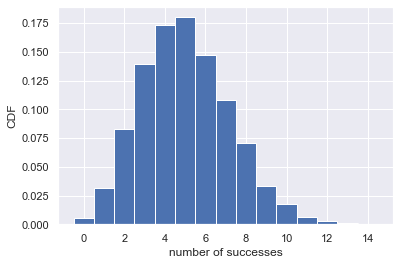

In [102]:
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

# Generate histogram
_ = plt.hist(n_defaults, normed=True, bins=bins)

# Label axes
_ = plt.xlabel('number of successes')
_ = plt.ylabel('CDF')

# Show the plot
plt.show()

## Poisson processes and the Poisson distribution


### Poisson process

- The timing of the next event is completely independent of when the previous event happened

### Examples of Poisson processes

- Natural births in a given hospital
- Hit on a website during a given hour
- Meteor strikes
- Molecular collisions in a gas
- Aviation incidents
- Buses in Poissonville

### Poisson distribution

- The number r of arrivals of a Poisson process in a given time interval with average rate of λ arrivals
    per interval is Poisson distributed.
    
- The number r of hits on a website in one hour with an average hit rate of 6 hits per hour is Poisson distributed.

- Limit of the Binomial distribution for low probability of success and large number of trials. That is, for rare events.

### The Poisson CDF

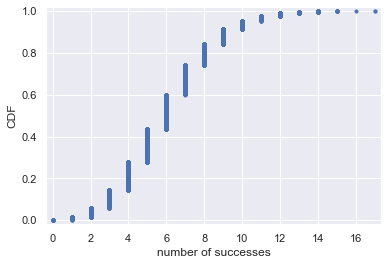

In [103]:
samples = np.random.poisson(6, size=10000)
x, y = ecdf(samples)
_ = plt.plot(x, y, marker='.', linestyle='none') 
plt.margins(0.02)
_ = plt.xlabel('number of successes')
_ = plt.ylabel('CDF')
plt.show()

### Exercise

The Poisson distribution with arrival rate equal to $np$ approximates a Binomial distribution for $n$ Bernoulli trials with probability $p$ of success (with $n$ large and $p$ small). Importantly, the Poisson distribution is often simpler to work with because it has only one parameter instead of two for the Binomial distribution.

In [104]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10, 10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]

# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i], p[i], 10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))
    
# Te means are all about the same, which can be shown to be true by doing some pen-and-paper work. 
# The standard deviation of the Binomial distribution gets closer and closer to that of the Poisson 
# distribution as the probability p gets lower and lower.

Poisson:      9.9892 3.217309957091483
n = 20 Binom: 10.0451 2.249058912078561
n = 100 Binom: 10.0361 3.033182617317988
n = 1000 Binom: 9.9784 3.1801153186637747


Was 2015 anomalous?

1990 and 2015 featured the most no-hitters of any season of baseball (there were seven). Given that there are on average 251/115 no-hitters per season, what is the probability of having seven or more in a season?

In [105]:
# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters = np.random.poisson(251/115, size=10000)

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters >= 7)

# Compute probability of getting seven or more: p_large
p_large = n_large / 10000

# Print the result
print('Probability of seven or more no-hitters:', p_large) 

# The result is about 0.007. This means that it is not that improbable to see a 
# 7-or-more no-hitter season in a century. We have seen two in a century and a half, so it is not unreasonable.

Probability of seven or more no-hitters: 0.0076


# Thinking probabilistically-- Continuous variables

## Probability density functions

### Continuous variables

- Quantities that can take any value, not just discrete values 

### Probability density function (PDF)

- Continuous analog to the PMF
- Mathematical description of the relative likelihood of observing a value of a continuous variable

## Introduction to the Normal distribution

### Normal distribution

- Describes a continuous variable whose PDF has a single symmetric peak.


### Checking Normality of Michelson data

In [109]:
michelson_speed_of_light = pd.read_csv('data/michelson_speed_of_light.csv')
michelson_speed_of_light = michelson_speed_of_light["velocity of light in air (km/s)"]

In [112]:
import numpy as np

mean = np.mean(michelson_speed_of_light)
std = np.std(michelson_speed_of_light)
samples = np.random.normal(mean, std, size=10000)
x, y = ecdf(michelson_speed_of_light)
x_theor, y_theor = ecdf(samples)

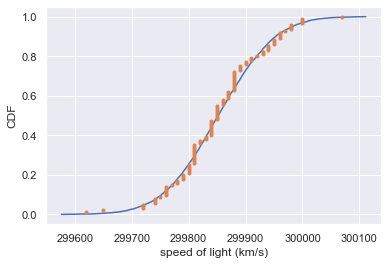

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none') 
_ = plt.xlabel('speed of light (km/s)')
_ = plt.ylabel('CDF') 
plt.show()

### Exercise

The Normal PDF

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


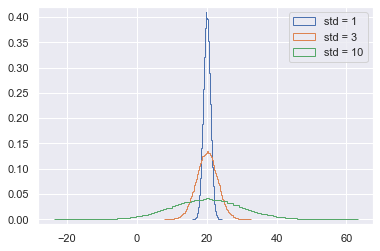

In [116]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1 = np.random.normal(20, 1, size=100000)
samples_std3 = np.random.normal(20, 3, size=100000)
samples_std10 = np.random.normal(20, 10, size=100000)

# Make histograms
sns.set()
plt.hist(samples_std1, bins=100, normed=True, histtype='step')
plt.hist(samples_std3, bins=100, normed=True, histtype='step')
plt.hist(samples_std10, bins=100, normed=True, histtype='step')

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()

The Normal CDF

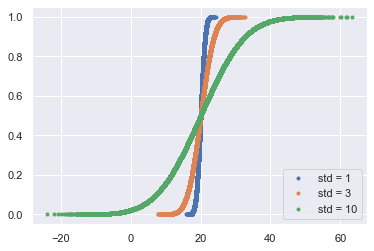

In [117]:
# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)


# Plot CDFs
sns.set()
_ = plt.plot(x_std1, y_std1, marker='.', linestyle='none') 
_ = plt.plot(x_std3, y_std3, marker='.', linestyle='none') 
_ = plt.plot(x_std10, y_std10, marker='.', linestyle='none') 

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()

## The Normal distribution: Properties and warnings


### Exercise

Are the Belmont Stakes results Normally distributed

Since 1926, the Belmont Stakes is a 1.5 mile-long race of 3-year old thoroughbred horses. Secretariat ran the fastest Belmont Stakes in history in 1973. While that was the fastest year, 1970 was the slowest because of unusually wet and sloppy conditions. With these two outliers removed from the data set, compute the mean and standard deviation of the Belmont winners' times. Sample out of a Normal distribution with this mean and standard deviation using the np.random.normal() function and plot a CDF. Overlay the ECDF from the winning Belmont times. Are these close to Normally distributed?

In [134]:
belmont_no_outliers = np.array([148.51, 146.65, 148.52, 150.7 , 150.42, 150.88, 151.57, 147.54,
       149.65, 148.74, 147.86, 148.75, 147.5 , 148.26, 149.71, 146.56,
       151.19, 147.88, 149.16, 148.82, 148.96, 152.02, 146.82, 149.97,
       146.13, 148.1 , 147.2 , 146.  , 146.4 , 148.2 , 149.8 , 147.  ,
       147.2 , 147.8 , 148.2 , 149.  , 149.8 , 148.6 , 146.8 , 149.6 ,
       149.  , 148.2 , 149.2 , 148.  , 150.4 , 148.8 , 147.2 , 148.8 ,
       149.6 , 148.4 , 148.4 , 150.2 , 148.8 , 149.2 , 149.2 , 148.4 ,
       150.2 , 146.6 , 149.8 , 149.  , 150.8 , 148.6 , 150.2 , 149.  ,
       148.6 , 150.2 , 148.2 , 149.4 , 150.8 , 150.2 , 152.2 , 148.2 ,
       149.2 , 151.  , 149.6 , 149.6 , 149.4 , 148.6 , 150.  , 150.6 ,
       149.2 , 152.6 , 152.8 , 149.6 , 151.6 , 152.8 , 153.2 , 152.4 ,
       152.2 ])


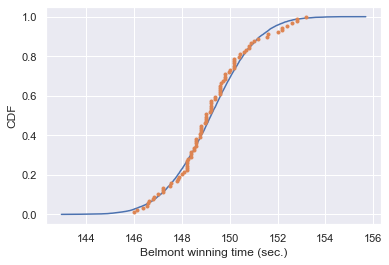

In [135]:
# Compute mean and standard deviation: mu, sigma
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size=10000)

# Get the CDF of the samples and of the data
x, y = ecdf(belmont_no_outliers)
x_theor, y_theor = ecdf(samples)


# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()

# The theoretical CDF and the ECDF of the data suggest that 
# the winning Belmont times are, indeed, Normally distributed. 
# This also suggests that in the last 100 years or so, there have not been major 
# technological or training advances that have significantly affected the speed at which horses can run this race.

What are the chances of a horse matching or beating Secretariat's record?

In [136]:
# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu, sigma, size=1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob = np.sum(samples<=144)/1000000

# Print the result
print('Probability of besting Secretariat:', prob)

Probability of besting Secretariat: 0.00061


## The Exponential distribution

- The waiting time between arrivals of a Poisson process is Exponentially distributed

### Possible Poisson process

- Nuclear incidents: Timing of one is independent of all others


### Exercise

How long must we wait to see both a no-hitter and then a batter hit the cycle? The idea is that we have to wait some time for the no-hitter, and then after the no-hitter, we have to wait for hitting the cycle. Stated another way, what is the total waiting time for the arrival of two different Poisson processes? The total waiting time is the time waited for the no-hitter, plus the time waited for the hitting the cycle.

In [138]:
# Define a function with call signature successive_poisson(tau1, tau2, size=1) that samples the waiting time for a no-hitter and a hit of the cycle.
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size)

    return t1 + t2

Distribution of no-hitters and cycles

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


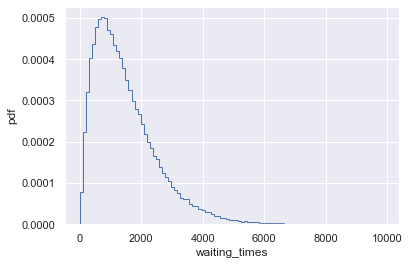

In [139]:
# Draw samples of waiting times: waiting_times
waiting_times = successive_poisson(764, 715, size=100000)

# Make the histogram
_ = plt.hist(waiting_times, bins=100, normed=True, histtype='step')


# Label axes
_ = plt.xlabel('waiting_times')
_ = plt.ylabel('pdf')

# Show the plot
plt.show()